In [11]:
%load_ext autoreload
%autoreload 2
import sys
import os
sys.path.append(os.path.join(os.getcwd(), "../src"))
from python_postprocessing.interface import ImDataParamsRelax
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
I = ImDataParamsRelax("../data/exp_pro/20230107_093945_602_ImDataParamsBMRR.h5")
I.load_WFIparams("../data/exp_pro/20230107_093945_602_WFIparams_init.mat")
I.load_RelaxParams("../data/exp_pro/20230107_093945_602_RelaxParams_dictionary_matching.mat")

Load ../data/exp_pro/20230107_093945_602_ImDataParamsBMRR.h5 ...Done!
Load ../data/exp_pro/20230107_093945_602_WFIparams_init.mat... Done.
Load ../data/exp_pro/20230107_093945_602_RelaxParams_dictionary_matching.mat... Done.


In [14]:
iSlice = I.ImDataParams["signal"].shape[2] // 2
print(I.ImDataParams["signal"].shape) ## x, y, z, numContr, numEchoes

(224, 224, 114, 4, 2)


(-0.5, 223.5, 223.5, -0.5)

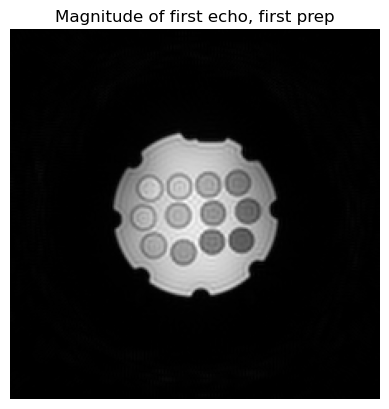

In [15]:
plt.figure()
plt.title("Magnitude of first echo, first prep")
plt.imshow(np.abs(I.ImDataParams["signal"][:,:,iSlice,0,0]), cmap="gray")
plt.axis("off")

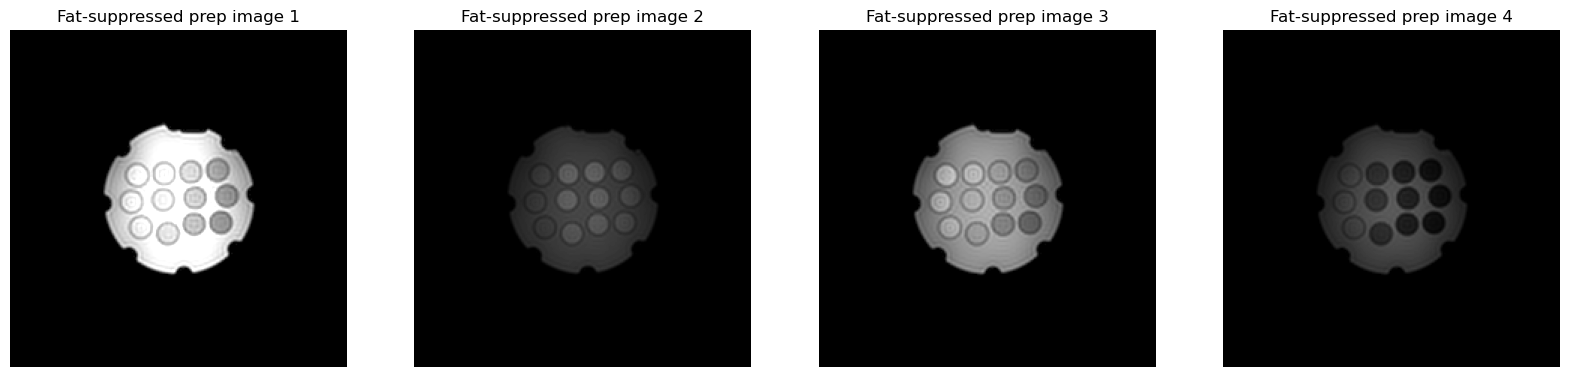

In [16]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # 1 row, 4 columns

vmax = np.percentile(np.abs(I.WFIparams["water"][:,:,:,0]), 99)
for i in range(4):
    axs[i].imshow(np.abs(I.WFIparams["water"][:,:,iSlice,i]), cmap="gray", vmin=0, vmax=vmax)
    axs[i].set_title(f'Fat-suppressed prep image {i+1}')
    axs[i].axis('off')  # Hide axis labels

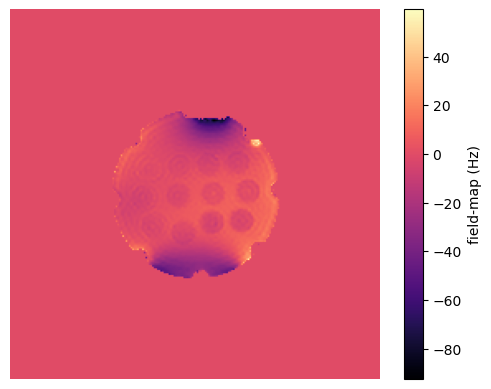

In [17]:
plt.figure()
plt.imshow(I.WFIparams["fieldmap_Hz"][:,:,iSlice,0], cmap="magma")
plt.axis("off")
plt.colorbar(label="field-map (Hz)")

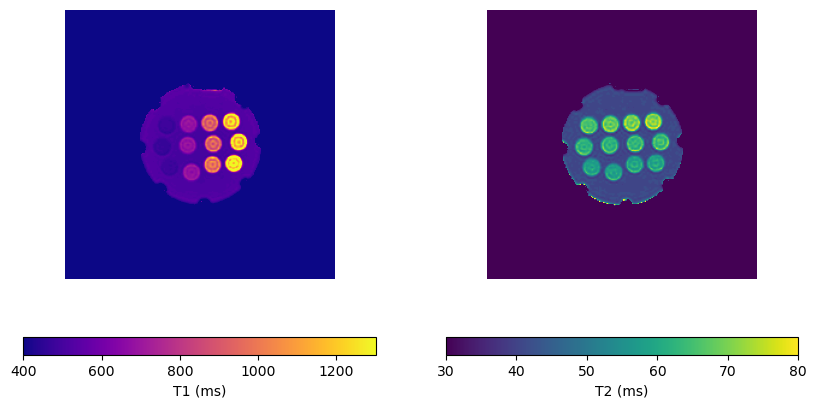

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 
c1 = ax1.imshow(I.RelaxParams["T1_ms"][:,:,iSlice], cmap="plasma", vmin=400, vmax=1300)
ax1.axis("off")
fig.colorbar(c1, ax=ax1, location="bottom", label="T1 (ms)")
c2 = ax2.imshow(I.RelaxParams["T2_ms"][:,:,iSlice], cmap="viridis", vmin=30, vmax=80)
ax2.axis("off")
fig.colorbar(c2, ax=ax2, location="bottom", label="T2 (ms)")
